# Import Relevant Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

# Loading and Transforming Data

In [4]:
raw_csv_data = pd.read_csv("Index2018.csv")

In [5]:
raw_csv_data

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


In [6]:
raw_csv_data.date.dtype

dtype('O')

In [7]:
df_comp = raw_csv_data.copy()

In [8]:
df_comp.date = pd.to_datetime(df_comp.date , dayfirst = True)

In [9]:
df_comp.date.dtype

dtype('<M8[ns]')

In [10]:
df_comp.set_index("date",inplace=True)

In [11]:
df_comp = df_comp.asfreq('b')

In [12]:
df_comp = df_comp.fillna(method = 'ffill')

<ipython-input-12-5e4a8f53b23f>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_comp = df_comp.fillna(method = 'ffill')


In [13]:
df_comp['market_value'] = df_comp.spx

In [14]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']

In [15]:
df_comp

,market_value
date,
1994-01-07,469.900000
1994-01-10,475.270000
1994-01-11,474.130000
1994-01-12,474.170000
1994-01-13,472.470000
...,...
2018-01-23,2839.130362
2018-01-24,2837.544008
2018-01-25,2839.253031


In [16]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size] , df_comp.iloc[size:]

In [17]:
df.size

5021

In [18]:
df_test.size

1256

White noise

In [19]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [20]:
df['wn'] = wn

<ipython-input-20-f05b4814bfab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [21]:
df

,market_value,wn
date,,
1994-01-07,469.900000,1077.547848
1994-01-10,475.270000,915.213519
1994-01-11,474.130000,1539.951641
1994-01-12,474.170000,1377.914045
1994-01-13,472.470000,858.924975
...,...,...
2013-04-01,1562.173837,1712.053276
2013-04-02,1570.252238,1302.901667
2013-04-03,1553.686978,1902.431002


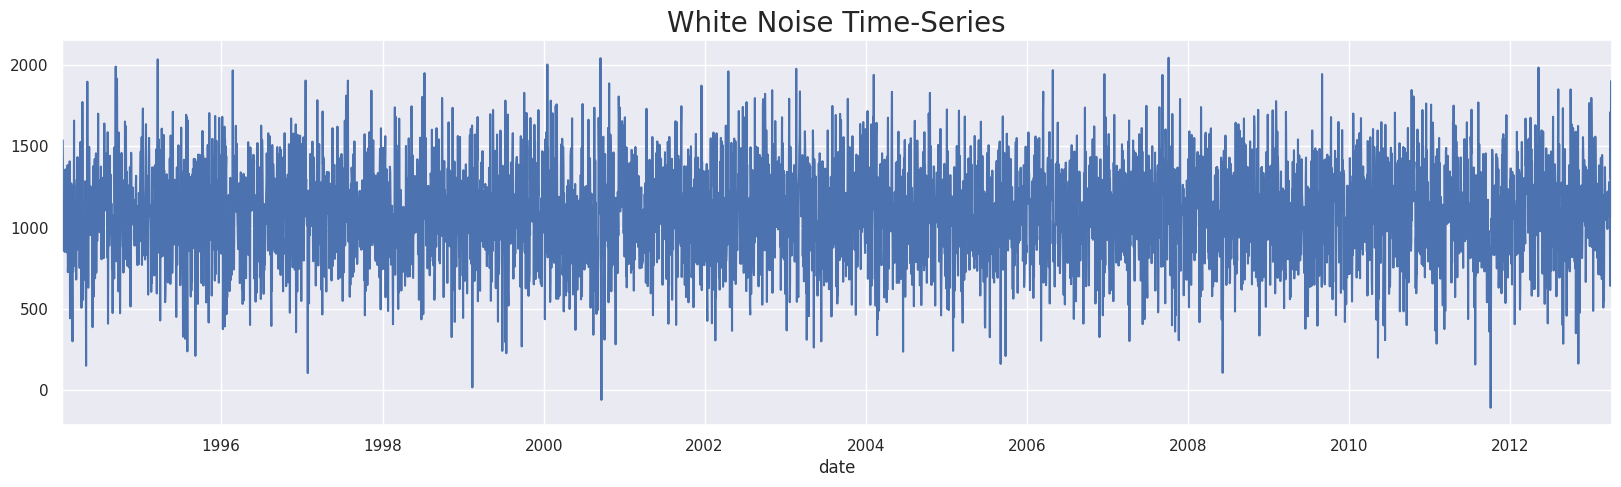

In [22]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size = 20)
plt.show()

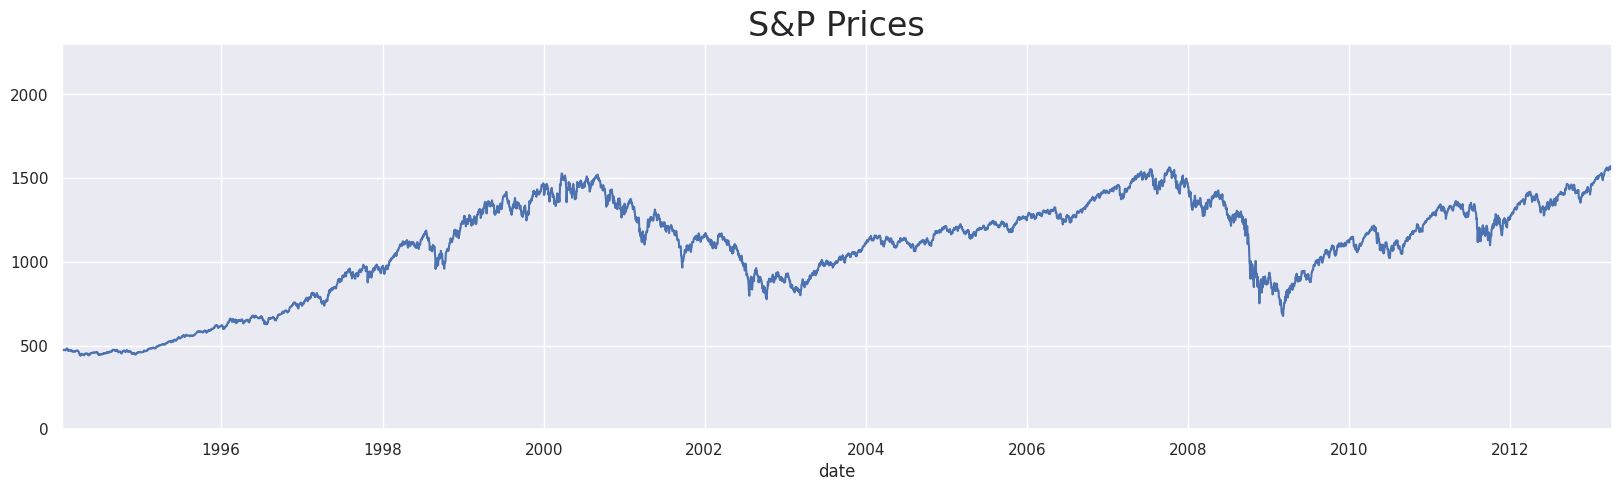

In [23]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)
plt.show()

# Seasonality

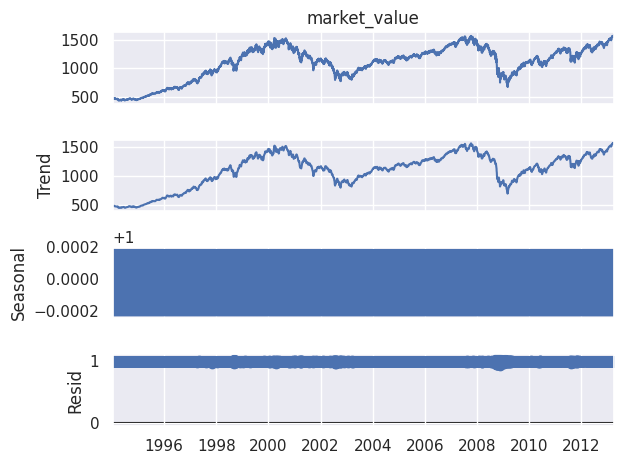

In [24]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

# ACF

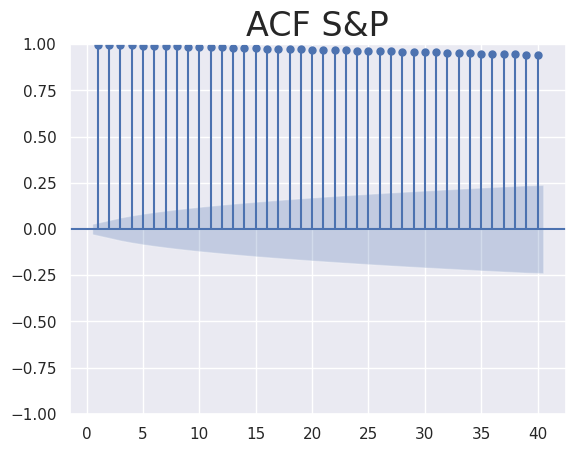

In [25]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

# PACF

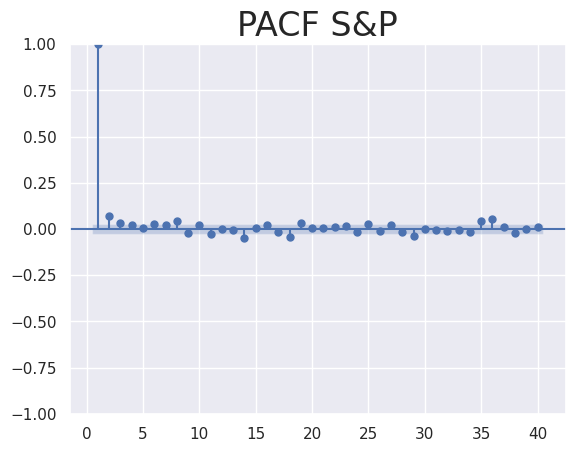

In [26]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

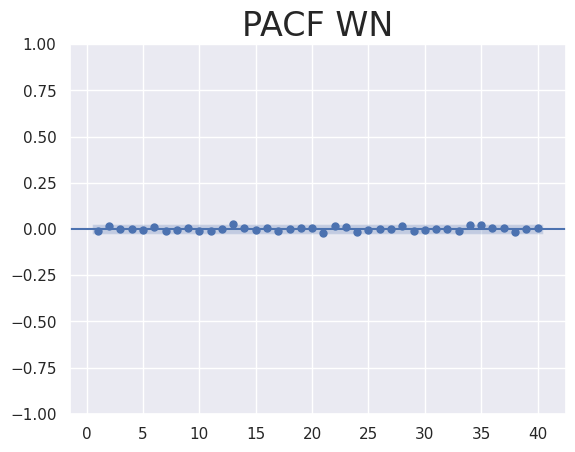

In [27]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()